# Systematic Trading Code

The code below install all required packages and then reads inthe list of tickers from wikipedia to then pull the data for the current S&P 500 from yahoo finance.

The DataFrame produced also needs to be cleaned due to the large number of NaN values stored inside and it is up to you to decide exactly how to do this. 

A lot of these NaN values arise because the stock price data for a specific company is not stored on Yahoo finance before a certain date. This could be for multiple reasons. 

The code has been set to remove all dates with NaN values although this only gives approx 6 mounths of data for backtesting. If you want to use more dates for backtesting then this will need to be changed.



In [1]:
# install yfinance


In [1]:
pip install yfinance

  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\rijul\\anaconda3\\Lib\\site-packages\\~xml\\etree.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


In [1]:
import numpy as np
import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
tickers = list(pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"].dropna())

for i in range(len(tickers)):
  tickers[i] = tickers[i].replace(".","-")
# feel free to change this time value although if you choose a date that was more than 10 years ago it will take yf a while to download all the data
data = yf.download(tickers,"2015-01-01")

[*********************100%***********************]  503 of 503 completed


In [9]:
# running these commands can help to understand the shape of the dataframe object data
data.head()
data.columns[400:2000]

MultiIndex([('Adj Close',  'ROK'),
            ('Adj Close',  'ROL'),
            ('Adj Close',  'ROP'),
            ('Adj Close', 'ROST'),
            ('Adj Close',  'RSG'),
            ('Adj Close',  'RTX'),
            ('Adj Close', 'SBAC'),
            ('Adj Close', 'SBUX'),
            ('Adj Close', 'SCHW'),
            ('Adj Close', 'SEDG'),
            ...
            (      'Low',  'WEC'),
            (      'Low', 'WELL'),
            (      'Low',  'WFC'),
            (      'Low',  'WHR'),
            (      'Low',   'WM'),
            (      'Low',  'WMB'),
            (      'Low',  'WMT'),
            (      'Low',  'WRB'),
            (      'Low',  'WRK'),
            (      'Low',  'WST')],
           length=1600)

In [13]:
def data_dropna():
  #  note the dataframe below has lots of NaN values because not all stocks were listed from 2016
  return data.dropna()

def data_enter_team_name():
  ## this should output all data you need for your strategy
  return data["2015-01-01"].dropna(axis=1)

In [14]:
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,150.039993,12.740000,151.539993,124.879326,160.850937,163.785202,109.086090,62.459999,269.159027,336.920013,...,85.610001,69.512016,105.696678,32.689999,110.419327,126.378281,127.279999,260.200012,48.083199,146.505768
2023-01-04,151.669998,13.590000,151.889999,126.167366,162.148605,162.369568,110.708740,62.770000,268.242767,341.410004,...,90.900002,70.107239,106.004311,33.779999,110.249847,128.090393,128.460007,262.989990,49.839436,148.610809
2023-01-05,152.110001,13.990000,153.160004,124.829399,161.950485,162.578934,110.300591,62.939999,261.908691,328.440002,...,91.339996,68.688622,108.376060,33.090000,107.119507,127.114883,126.080002,260.059998,48.966278,145.109039
2023-01-06,147.669998,14.180000,154.020004,129.422394,164.981674,165.200851,111.823700,63.900002,268.113312,332.750000,...,93.570000,70.722305,109.685974,33.430000,110.927757,129.693008,125.699997,273.420013,50.861427,147.293900
2023-01-09,147.470001,14.610000,152.259995,129.951584,160.137726,164.463120,111.644508,62.669998,272.634827,341.980011,...,94.330002,71.406807,107.641708,32.990002,111.446159,129.165451,126.050003,279.290009,50.623295,146.715256
2023-01-10,155.229996,15.190000,151.970001,130.530701,158.136734,166.746078,113.336845,63.070000,273.809998,338.700012,...,97.470001,71.535774,109.249336,33.320000,112.592621,128.807098,125.500000,286.929993,50.643139,153.998154
2023-01-11,158.169998,15.340000,153.279999,133.286499,155.689987,164.881836,112.639999,62.849998,281.079987,342.929993,...,96.239998,72.200432,110.519569,35.110001,114.506714,129.095779,124.320000,299.790009,50.930885,157.529846
2023-01-12,156.490005,16.830000,152.190002,133.206619,152.220001,164.393326,111.360001,63.070000,283.839996,344.540009,...,98.610001,71.377045,112.355438,36.000000,115.832626,128.299438,123.199997,293.000000,51.049953,159.535141
2023-01-13,156.919998,17.020000,151.029999,134.554550,153.600006,163.775238,113.510002,63.759998,282.140015,344.380005,...,100.250000,70.603256,112.285973,36.549999,116.570351,129.623337,123.379997,293.700012,50.990417,160.542770


In [10]:
def buyandhold(start_date, end_date):
  strat = pd.DataFrame(data = np.ones([len(df),len(df.columns)])/len(df.columns), 
                       index = df.index)
  
  return strat

## Time Series Momentum Strategy
The aim of this task is to implement a backtest for the time series momentum strategy:

- This strategy will take a postion in every asset in the given basket.
- If an asset has a negative historic return then a short positon is taken and if it has a postitve histioric return then it a long postion is taken.
- The lookback period for which returns are calculated is the previous 20 days. 

In [11]:
def strat_time_series_momentum(start_date, end_date): # enter youre team name!!!
  # insert your strategy here!!!!!
  # note this function shoudl return a dataframe of weights with columns representing each stock
  # and index representing the same datetime index as the data used
  momentum = df.pct_change(20)
  print(momentum)
  strat = momentum/(500*abs(momentum))
  strat = strat.fillna(0)
  return strat


##Relative Momentum Strategy
The aim of this task is to implement a backtest for the relative momentum strategy:

- For each date the strategy will take a long postion in the p best previous performing stocks and a short postion in the p worst performing stocks.
- The lookback period for which performance will be judged will be the previous t days.
- We will also only adjust our portfolio weights every q days. Note the first date that we can calculate weights will be on date (t+1) so we aim to adjust our portfolio weights every q days after this.
- For the worst performing stocks the weights should be negative and for the best performing stocks weights postitive such that the sum of the absolute values across each row of the strategy weights is equal to 1!! I.e the weights for the worst stocks are -1/(2p) and for the best p stocks 1/(2p). All other weights are 0.

For this algorithm performance is measured by cumulative returns.

In [9]:
def strat_relative_momentum(start_date, end_date):
  ##### enter code below
  strat = pd.DataFrame(data = np.zeros([len(df),len(df.columns)])/len(df.columns), 
                       index = df.index)
  
  return strat

In [14]:
def strategy(start_date, end_date, 
                  strat_func=buyandhold, data_func=data_dropna, 
                  fig_strat=True, risk_free_rate = 0.001):
  global df 
  df = data_func()["Adj Close"][start_date: end_date]
  return_df = np.array(df.pct_change())
  strat_df = pd.DataFrame(index = df.index)
  strat_df["daily returns"] = (return_df * strat_func(start_date, end_date).shift(1)).sum(axis=1)
  strat_df["cumulative % returns"] = ((strat_df["daily returns"]+1).cumprod() - 1) * 100
  
  sharpe  = 0.01*((strat_df["cumulative % returns"][-1]/100 - 
                    len(strat_df) * risk_free_rate) /
                    strat_df["daily returns"].std())
  if fig_strat:
    plt.figure()
    plt.title("Strategy Backtest from "+ start_date+" to "+end_date)
    plt.plot(strat_df["cumulative % returns"])
    plt.plot(strat_df["cumulative % returns"].rolling(25).mean())
    plt.show()
  
  return strat_df, sharpe
 

In [16]:
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,150.039993,12.740000,151.539993,124.879326,160.850937,163.785202,109.086090,62.459999,269.159027,336.920013,...,85.610001,69.512016,105.696678,32.689999,110.419327,126.378281,127.279999,260.200012,48.083199,146.505768
2023-01-04,151.669998,13.590000,151.889999,126.167366,162.148605,162.369568,110.708740,62.770000,268.242767,341.410004,...,90.900002,70.107239,106.004311,33.779999,110.249847,128.090393,128.460007,262.989990,49.839436,148.610809
2023-01-05,152.110001,13.990000,153.160004,124.829399,161.950485,162.578934,110.300591,62.939999,261.908691,328.440002,...,91.339996,68.688622,108.376060,33.090000,107.119507,127.114883,126.080002,260.059998,48.966278,145.109039
2023-01-06,147.669998,14.180000,154.020004,129.422394,164.981674,165.200851,111.823700,63.900002,268.113312,332.750000,...,93.570000,70.722305,109.685974,33.430000,110.927757,129.693008,125.699997,273.420013,50.861427,147.293900
2023-01-09,147.470001,14.610000,152.259995,129.951584,160.137726,164.463120,111.644508,62.669998,272.634827,341.980011,...,94.330002,71.406807,107.641708,32.990002,111.446159,129.165451,126.050003,279.290009,50.623295,146.715256
2023-01-10,155.229996,15.190000,151.970001,130.530701,158.136734,166.746078,113.336845,63.070000,273.809998,338.700012,...,97.470001,71.535774,109.249336,33.320000,112.592621,128.807098,125.500000,286.929993,50.643139,153.998154
2023-01-11,158.169998,15.340000,153.279999,133.286499,155.689987,164.881836,112.639999,62.849998,281.079987,342.929993,...,96.239998,72.200432,110.519569,35.110001,114.506714,129.095779,124.320000,299.790009,50.930885,157.529846
2023-01-12,156.490005,16.830000,152.190002,133.206619,152.220001,164.393326,111.360001,63.070000,283.839996,344.540009,...,98.610001,71.377045,112.355438,36.000000,115.832626,128.299438,123.199997,293.000000,51.049953,159.535141
2023-01-13,156.919998,17.020000,151.029999,134.554550,153.600006,163.775238,113.510002,63.759998,282.140015,344.380005,...,100.250000,70.603256,112.285973,36.549999,116.570351,129.623337,123.379997,293.700012,50.990417,160.542770


                   A       AAL       AAP      AAPL      ABBV       ABC  \
Date                                                                     
2023-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-09       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-10       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-11       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-12       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-13       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-17       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-18       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-19       NaN       NaN       N

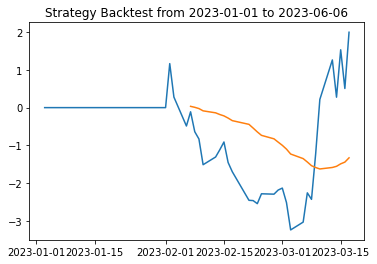

(            daily returns  cumulative % returns
 Date                                           
 2023-01-03       0.000000              0.000000
 2023-01-04       0.000000              0.000000
 2023-01-05       0.000000              0.000000
 2023-01-06       0.000000              0.000000
 2023-01-09       0.000000              0.000000
 2023-01-10       0.000000              0.000000
 2023-01-11       0.000000              0.000000
 2023-01-12       0.000000              0.000000
 2023-01-13       0.000000              0.000000
 2023-01-17       0.000000              0.000000
 2023-01-18       0.000000              0.000000
 2023-01-19       0.000000              0.000000
 2023-01-20       0.000000              0.000000
 2023-01-23       0.000000              0.000000
 2023-01-24       0.000000              0.000000
 2023-01-25       0.000000              0.000000
 2023-01-26       0.000000              0.000000
 2023-01-27       0.000000              0.000000
 2023-01-30       0.

In [15]:
strategy("2023-01-01", "2023-06-06", strat_func=strat_time_series_momentum) # example for buy and hold strategy after removing all dates with NaN values

##Moving Average Model##
The concept behind this model involves comparing the short term moving average (e.g average over the last 5 days) with a long term moving average (e.g average over the last 200 days) at each time point. This comparison is what produces buy/sell signals.

###Strategy Outline
This strategy has 2 parameters.

s - the lookback period for calculating the moving average over a short time period.
l - the lookback period for calculating the moving average over a large time period.
At each time instance it is necessary to calculate the simple moving average of the previous s and l asset prices. To do this in code you could for example do self.data["Adj Close"][c][i-s:i].mean() i,e calculate the mean of the previous s values at time step i for stock code or ticker c.

Then if the short moving average crosses the long moving average i.e the value of the small time period MA is greater than the large time period MA then this is a buy signal. Otherwise enter a neutral position. (for this strategy there will be no short selling)

For an individual security at a ceratin time point a buy signal corresponds to a positive value in self.strat and a neutral postion corresponds to a 0. Remember to also normalize across each row of self.strat as was done in the time series momentum strategy in lecture 1.

Extension
An optional part of the coursework will be to extend the complexity of the strategy. You are free to investigate or develop any extra code that you like although I will include a few examples of how to extend the above model:

Instead of using simple moving average's try to code exponential moving averages or attempt to use Kauffmann's adoptive moving average. For more info on this check out https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/kaufmans-adaptive-moving-average-kama/
Implement a weighting scheme.
Investigate how varying the parameters of the number of days used in calculating moving averages effects returns and/or volatilty. Try discussing how you would tune the parameters in the question.
If you do decide to complete an extension please include a brief summary of what it is you aim to implement in a text block and try to make your code readable by including comments etc... .



In [16]:
def strat_insert_team_name(start_date, end_date):
  pass

In [ ]:
 # use this cell to backtest your own strategy. make sure to change the function names
strategy("2022-01-01", "2023-06-06", strat_func = strat_insert_team_name, data_func = data_enter_team_name)